<a href="https://colab.research.google.com/github/Jegge2003/time_series_analysis_of_NAICS/blob/main/Time_Series_Analysis_Of_NAICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE NECESSARY LIBRARIES**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

**UPLOADING ALL NECESSARY FILES ONTO COLLAB**

In [ ]:
from google.colab import files
files.upload()

**LOADING, CHECKING, AND CLEANING THE LMO DETAILED INDUSTRIES BY NAICS**

In [69]:
#Loading the contents of LMO_Detailed_Industries_by_NAICS
df_lmo_details = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
#Displaying the first 5 rows
df_lmo_details.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [70]:
#Checking the total number of rows and columns
print('The total shape of the data is', df_lmo_details.shape)
#Checking for missing values
df_lmo_details.isnull().sum()

The total shape of the data is (59, 2)


LMO_Detailed_Industry    0
NAICS                    0
dtype: int64

REPLACING & WITH ,

In [71]:
#Checking the data types of the columns
df_lmo_details.dtypes

LMO_Detailed_Industry    object
NAICS                    object
dtype: object

In [72]:
#Converting to string and changing & to ,
df_lmo_details.NAICS = df_lmo_details.NAICS.astype(str).str.replace('&', ',')

In [73]:
#Printing first 5 rows to check if it is changed
df_lmo_details.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


**LOADING DATA OUTPUT TEMPLATE**

In [74]:
#Loading the contents of Data_Output_Template
df_output_tem = pd.read_excel('Data_Output_Template.xlsx')
#Displaying the first 5 rows
df_output_tem.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


**LOADING AND CLEANING RTRA 2-DIGIT NAICS FILES**

In [75]:
#Making a list to house all the RTRA_Employ_2NAICS data
rtra_2_list = ['RTRA_Employ_2NAICS_00_05.csv', 'RTRA_Employ_2NAICS_06_10.csv', 'RTRA_Employ_2NAICS_11_15.csv', 'RTRA_Employ_2NAICS_16_20.csv']

In [76]:
#Loading the data from 1997 to 1999
df_2 = pd.read_csv('RTRA_Employ_2NAICS_97_99.csv')

#For loop to join all the files together
for files in rtra_2_list:
  df = pd.read_csv(files)
  df_2 = df_2.append(df, ignore_index=True)

#Displaying first 5 rows of the dataset
df_2.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


In [77]:
#Checking the shape of all the 2 digit NAICS files
df_2.shape

(5472, 4)

In [78]:
#Splitting the NAICS column into NAICS and NAICS code at the [ index
df_2[['NAICS', 'NAICS_CODE']] = df_2['NAICS'].astype(str).str.split('[', expand=True)
#Displaying the first 5 rows
df_2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Accommodation and food services,129250,72]
1,1997,1,"Administrative and support, waste management a...",58500,56]
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11]
3,1997,1,"Arts, entertainment and recreation",38750,71]
4,1997,1,Construction,118000,23]


In [79]:
#Getting rid of the last bracket the replacing - with ,
df_2['NAICS_CODE'] = df_2['NAICS_CODE'].astype(str).str.strip(']').replace('-', ',')

#Displaying the first 5 rows to check if the change has been effected
df_2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Accommodation and food services,129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11
3,1997,1,"Arts, entertainment and recreation",38750,71
4,1997,1,Construction,118000,23


In [80]:
#Merging the 2 digit NAICS dataset with the LMO Details dataset
df_2_lmo = df_2.merge(df_lmo_details, left_on='NAICS_CODE', right_on='NAICS', how='left')

#Displaying the first 10 rows
df_2_lmo.head(10)

,SYEAR,SMTH,NAICS_x,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry,NAICS_y
0,1997,1,Accommodation and food services,129250,72,NaN,NaN
1,1997,1,"Administrative and support, waste management a...",58500,56,NaN,NaN
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11,NaN,NaN
3,1997,1,"Arts, entertainment and recreation",38750,71,NaN,NaN
4,1997,1,Construction,118000,23,Construction,23
5,1997,1,Educational services,118750,61,NaN,NaN
6,1997,1,Finance and insurance,77500,52,NaN,NaN
7,1997,1,Health care and social assistance,183000,62,NaN,NaN
8,1997,1,Information and cultural industries,40500,51,NaN,NaN
9,1997,1,Management of companies and enterprises,1750,55,NaN,NaN


In [81]:
#Dropping the NAICS_x and NAICS_y columns
df_2_lmo = df_2_lmo.drop(columns=['NAICS_x', 'NAICS_y'])

#Displaying the first 10 rows again
df_2_lmo.head(10)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,129250,72,NaN
1,1997,1,58500,56,NaN
2,1997,1,62250,11,NaN
3,1997,1,38750,71,NaN
4,1997,1,118000,23,Construction
5,1997,1,118750,61,NaN
6,1997,1,77500,52,NaN
7,1997,1,183000,62,NaN
8,1997,1,40500,51,NaN
9,1997,1,1750,55,NaN


In [82]:
combined= df_2_lmo.SMTH.astype('str').str.cat(df_2_lmo.SYEAR.astype('str'),sep=' ')
df_2_lmo['DATE']= pd.to_datetime(combined).dt.strftime('%Y-%m')
df_2_lmo.set_index('DATE',inplace=True)

In [83]:
#Dropping missing values
df_2_lmo = df_2_lmo.dropna()
df_2_lmo

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2019-12,2019,12,0,23,Construction
2019-12,2019,12,0,81,"Repair, personal and non-profit services"
2019-12,2019,12,0,53,Real estate rental and leasing


**LOADING AND CLEANING RTRA 3-DIGIT NAICS FILES**

In [84]:
#Making a list to house all the RTRA_Employ_3NAICS data
rtra_3_list = ['RTRA_Employ_3NAICS_00_05.csv', 'RTRA_Employ_3NAICS_06_10.csv', 'RTRA_Employ_3NAICS_11_15.csv', 'RTRA_Employ_3NAICS_16_20.csv']

In [85]:
#Loading the data from 1997 to 1999
df_3 = pd.read_csv('RTRA_Employ_3NAICS_97_99.csv')

#For loop to join all the files together
for files in rtra_3_list:
  df = pd.read_csv(files)
  df_3 = df_3.append(df, ignore_index=True)

#Displaying first 5 rows of the dataset
df_3.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


In [86]:
#Checking the shape of all the 3 digit NAICS files
df_3.shape

(28140, 4)

In [87]:
#Splitting the NAICS column into NAICS and NAICS code at the [ index
df_3[['NAICS', 'NAICS_CODE']] = df_3['NAICS'].astype(str).str.split('[', expand=True)
#Displaying the first 5 rows
df_3.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Aboriginal public administration,500,914]
1,1997,1,Accommodation services,24000,721]
2,1997,1,Administrative and support services,56750,561]
3,1997,1,Air transportation,17000,481]
4,1997,1,Ambulatory health care services,40000,621]


In [88]:
#Getting rid of the last bracket the replacing - with ,
df_3['NAICS_CODE'] = df_3['NAICS_CODE'].astype(str).str.strip(']').replace('-', ',')

#Displaying the first 5 rows to check if the change has been effected
df_3.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Aboriginal public administration,500,914
1,1997,1,Accommodation services,24000,721
2,1997,1,Administrative and support services,56750,561
3,1997,1,Air transportation,17000,481
4,1997,1,Ambulatory health care services,40000,621


In [89]:
#Merging the 3 digit NAICS dataset with the LMO Details dataset
df_3_lmo = df_3.merge(df_lmo_details, left_on='NAICS_CODE', right_on='NAICS', how='left')

#Displaying the first 10 rows
df_3_lmo.head(10)

,SYEAR,SMTH,NAICS_x,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry,NAICS_y
0,1997,1,Aboriginal public administration,500,914,NaN,NaN
1,1997,1,Accommodation services,24000,721,Accommodation services,721
2,1997,1,Administrative and support services,56750,561,NaN,NaN
3,1997,1,Air transportation,17000,481,Air transportation,481
4,1997,1,Ambulatory health care services,40000,621,Ambulatory health care services,621
5,1997,1,"Amusement, gambling and recreation industries",20000,713,"Amusement, gambling and recreation industries",713
6,1997,1,Animal production and aquaculture,13500,112,NaN,NaN
7,1997,1,Beverage and tobacco product manufacturing,2500,312,NaN,NaN
8,1997,1,Broadcasting (except Internet),4750,515,NaN,NaN
9,1997,1,Building material and garden equipment and sup...,16000,444,NaN,NaN


In [90]:
#Dropping the NAICS_x and NAICS_y columns
df_3_lmo = df_3_lmo.drop(columns=['NAICS_x', 'NAICS_y'])

#Displaying the first 10 rows again
df_3_lmo.head(10)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,500,914,NaN
1,1997,1,24000,721,Accommodation services
2,1997,1,56750,561,NaN
3,1997,1,17000,481,Air transportation
4,1997,1,40000,621,Ambulatory health care services
5,1997,1,20000,713,"Amusement, gambling and recreation industries"
6,1997,1,13500,112,NaN
7,1997,1,2500,312,NaN
8,1997,1,4750,515,NaN
9,1997,1,16000,444,NaN


In [91]:
month_year= df_3_lmo.SMTH.astype('str').str.cat(df_3_lmo.SYEAR.astype('str'),sep=' ')
df_3_lmo['DATE']= pd.to_datetime(month_year).dt.strftime('%Y-%m')
df_3_lmo.set_index('DATE',inplace=True)

In [92]:
#Dropping missing values
df_3_lmo = df_3_lmo.dropna()
df_3_lmo

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,24000,721,Accommodation services
1997-01,1997,1,17000,481,Air transportation
1997-01,1997,1,40000,621,Ambulatory health care services
1997-01,1997,1,20000,713,"Amusement, gambling and recreation industries"
1997-01,1997,1,11750,332,Fabricated metal product manufacturing
...,...,...,...,...,...
2019-12,2019,12,0,517,Telecommunications
2019-12,2019,12,0,484,Truck transportation
2019-12,2019,12,0,493,Warehousing and storage


**LOADING AND CLEANING RTRA 4-DIGIT NAICS FILES**

In [93]:
#Making a list to house all the RTRA_Employ_4NAICS data
rtra_4_list = ['RTRA_Employ_4NAICS_00_05.csv', 'RTRA_Employ_4NAICS_06_10.csv', 'RTRA_Employ_4NAICS_11_15.csv', 'RTRA_Employ_4NAICS_16_20.csv']

In [94]:
#Loading the data from 1997 to 1999
df_4 = pd.read_csv('RTRA_Employ_4NAICS_97_99.csv')

#For loop to join all the files together
for files in rtra_4_list:
  df = pd.read_csv(files)
  df_4 = df_4.append(df, ignore_index=True)

#Displaying first 5 rows of the dataset
df_4.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [95]:
#Checking the shape of all the 4 digit NAICS files
df_4.shape

(85572, 4)

In [96]:
#Splitting the NAICS column into NAICS and NAICS code at the [ index
df_4['NAICS_CODE'] = df_4['NAICS'].astype(str)
#Displaying the first 5 rows
df_4.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,1100,3500,1100
1,1997,1,1111,250,1111
2,1997,1,1112,500,1112
3,1997,1,1113,2250,1113
4,1997,1,1114,5250,1114


In [97]:
#Merging the 3 digit NAICS dataset with the LMO Details dataset
df_4_lmo = df_4.merge(df_lmo_details, left_on='NAICS_CODE', right_on='NAICS', how='left')

#Displaying the first 10 rows
df_4_lmo.head(10)

,SYEAR,SMTH,NAICS_x,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry,NAICS_y
0,1997,1,1100,3500,1100,NaN,NaN
1,1997,1,1111,250,1111,NaN,NaN
2,1997,1,1112,500,1112,NaN,NaN
3,1997,1,1113,2250,1113,NaN,NaN
4,1997,1,1114,5250,1114,NaN,NaN
5,1997,1,1119,250,1119,NaN,NaN
6,1997,1,1121,8250,1121,NaN,NaN
7,1997,1,1122,500,1122,NaN,NaN
8,1997,1,1123,1500,1123,NaN,NaN
9,1997,1,1124,500,1124,NaN,NaN


In [98]:
#Dropping the NAICS_x and NAICS_y columns
df_4_lmo = df_4_lmo.drop(columns=['NAICS_x', 'NAICS_y'])

#Displaying the first 10 rows again
df_4_lmo.head(10)

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,3500,1100,NaN
1,1997,1,250,1111,NaN
2,1997,1,500,1112,NaN
3,1997,1,2250,1113,NaN
4,1997,1,5250,1114,NaN
5,1997,1,250,1119,NaN
6,1997,1,8250,1121,NaN
7,1997,1,500,1122,NaN
8,1997,1,1500,1123,NaN
9,1997,1,500,1124,NaN


In [99]:
month_year= df_4_lmo.SMTH.astype('str').str.cat(df_4_lmo.SYEAR.astype('str'),sep=' ')
df_4_lmo['DATE']= pd.to_datetime(month_year).dt.strftime('%Y-%m')
df_4_lmo.set_index('DATE',inplace=True)

In [100]:
#Dropping missing values
df_4_lmo = df_4_lmo.dropna()
df_4_lmo

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,3500,3366,Ship and boat building
1997-01,1997,1,27000,5413,"Architectural, engineering and related services"
1997-01,1997,1,18250,5415,Computer systems design and related services
1997-01,1997,1,16250,5416,"Management, scientific and technical consultin..."
1997-01,1997,1,78250,6111,Elementary and secondary schools
...,...,...,...,...,...
2019-12,2019,12,0,5415,Computer systems design and related services
2019-12,2019,12,0,5416,"Management, scientific and technical consultin..."
2019-12,2019,12,0,6111,Elementary and secondary schools


**JOINING ALL 3 DIFFERENT DATASETS INTO ONE**

In [101]:
#Adding the datasets together
df_2_3 = df_2_lmo.append(df_3_lmo)
df_naics_set = df_2_3.append(df_4_lmo)
df_naics_set

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2019-12,2019,12,0,5415,Computer systems design and related services
2019-12,2019,12,0,5416,"Management, scientific and technical consultin..."
2019-12,2019,12,0,6111,Elementary and secondary schools


**TAKING AND CLEANING DATA FROM 1997 TO 2018 FOR ANALYSIS**

In [102]:
#Choosing rows with indices less than 2019
df_naics_97_18 = df_naics_set[(df_naics_set.index).astype(str) < '2019']

#Displaying some of the rows
df_naics_97_18

,SYEAR,SMTH,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
DATE,,,,,
1997-01,1997,1,118000,23,Construction
1997-01,1997,1,89250,81,"Repair, personal and non-profit services"
1997-01,1997,1,50750,53,Real estate rental and leasing
1997-01,1997,1,9750,22,Utilities
1997-01,1997,1,72000,41,Wholesale trade
...,...,...,...,...,...
2018-12,2018,12,61500,5415,Computer systems design and related services
2018-12,2018,12,23750,5416,"Management, scientific and technical consultin..."
2018-12,2018,12,94250,6111,Elementary and secondary schools


In [103]:
#Forming right date format from SMTH and SYEAR and making it the index of the dataset
month_year= df_output_tem.SMTH.astype('str').str.cat(df_output_tem.SYEAR.astype('str'),sep=' ')
df_output_tem['DATE']= pd.to_datetime(month_year).dt.strftime('%Y-%m')
df_output_tem.set_index('DATE',inplace=True)

df_output_tem

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
DATE,,,,
1997-01,1997,1,Accommodation services,NaN
1997-01,1997,1,Air transportation,NaN
1997-01,1997,1,Ambulatory health care services,NaN
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN
1997-01,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
2018-12,2018,12,Utilities,NaN
2018-12,2018,12,Warehousing and storage,NaN
2018-12,2018,12,Water transportation,NaN


**MERGING DATA FROM 1997 TO 2018 AND THE DATA OUTPUT TEMPLATE**

In [104]:
#Merging datasets together
final_data = df_output_tem.merge(df_naics_97_18, left_on=['DATE','LMO_Detailed_Industry'], right_on=['DATE','LMO_Detailed_Industry'], how='left')
#Displaying dataset
final_data

,SYEAR_x,SMTH_x,LMO_Detailed_Industry,Employment,SYEAR_y,SMTH_y,_EMPLOYMENT_,NAICS_CODE
DATE,,,,,,,,
1997-01,1997,1,Accommodation services,NaN,1997.0,1.0,24000.0,721
1997-01,1997,1,Air transportation,NaN,1997.0,1.0,17000.0,481
1997-01,1997,1,Ambulatory health care services,NaN,1997.0,1.0,40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",NaN,1997.0,1.0,20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",NaN,1997.0,1.0,27000.0,5413
...,...,...,...,...,...,...,...,...
2018-12,2018,12,Utilities,NaN,2018.0,12.0,12250.0,22
2018-12,2018,12,Warehousing and storage,NaN,2018.0,12.0,8750.0,493
2018-12,2018,12,Water transportation,NaN,2018.0,12.0,5000.0,483


In [105]:
#Dropping SYEAR_y and SMTH_y 
final_data = final_data.drop(columns=['SYEAR_y', 'SMTH_y'], axis=1)

#Fusing _EMPLOYMENT_ into Employment
final_data['Employment'] = final_data._EMPLOYMENT_

#Dropping _EMPLOYMENT_ column
final_data = final_data.drop('_EMPLOYMENT_', axis=1)

#Renaming SYEAR_x and SMTH_x columns to SYEAR and SMTH
final_data.rename(columns={'SYEAR_x': 'SYEAR', 'SMTH_x':'SMTH'},inplace=True)

final_data

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Accommodation services,24000.0,721
1997-01,1997,1,Air transportation,17000.0,481
1997-01,1997,1,Ambulatory health care services,40000.0,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000.0,713
1997-01,1997,1,"Architectural, engineering and related services",27000.0,5413
...,...,...,...,...,...
2018-12,2018,12,Utilities,12250.0,22
2018-12,2018,12,Warehousing and storage,8750.0,493
2018-12,2018,12,Water transportation,5000.0,483


In [106]:
#Describing the final data
final_data.describe()

,SYEAR,SMTH,Employment
count,15576.000000,15576.000000,12144.000000
mean,2007.500000,6.500000,32382.411067
std,6.344492,3.452163,35928.797880
min,1997.000000,1.000000,250.000000
25%,2002.000000,3.750000,9750.000000
50%,2007.500000,6.500000,20500.000000
75%,2013.000000,9.250000,38562.500000
max,2018.000000,12.000000,242750.000000


In [107]:
#Information about the data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15576 entries, 1997-01 to 2018-12
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  15576 non-null  int64  
 1   SMTH                   15576 non-null  int64  
 2   LMO_Detailed_Industry  15576 non-null  object 
 3   Employment             12144 non-null  float64
 4   NAICS_CODE             12144 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 730.1+ KB


In [108]:
#Checking for missing data
final_data.isnull().sum()

SYEAR                       0
SMTH                        0
LMO_Detailed_Industry       0
Employment               3432
NAICS_CODE               3432
dtype: int64

In [109]:
#Filling NAN values with 0
final_data['Employment']=final_data['Employment'].fillna(0).astype(int)
final_data['NAICS_CODE']=final_data['NAICS_CODE'].fillna(0).astype(int)

final_data

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Accommodation services,24000,721
1997-01,1997,1,Air transportation,17000,481
1997-01,1997,1,Ambulatory health care services,40000,621
1997-01,1997,1,"Amusement, gambling and recreation industries",20000,713
1997-01,1997,1,"Architectural, engineering and related services",27000,5413
...,...,...,...,...,...
2018-12,2018,12,Utilities,12250,22
2018-12,2018,12,Warehousing and storage,8750,493
2018-12,2018,12,Water transportation,5000,483


In [110]:
#Data output as given
data_output = final_data.reset_index().drop(columns=['DATE', 'NAICS_CODE'])
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",27000
...,...,...,...,...
15571,2018,12,Utilities,12250
15572,2018,12,Warehousing and storage,8750
15573,2018,12,Water transportation,5000
15574,2018,12,Wholesale trade,91500


In [111]:
#Saving final output data
data_output.to_excel('Data_Output.xlsx')

**VISUALIZATION AND QUESTION ANSWERING**

1. HOW EMPLOYMENT IN CONSTRUCTION EVOLVED OVER TIME AND HOW THIS COMPARES TO THE TOTAL EMPLOYMENT ACROSS ALL COUNTRIES.

In [112]:
#Taking only rows with Construction as LMO_Detailed_Industry
construction = final_data[final_data['LMO_Detailed_Industry'] == 'Construction']

#Displaying the columns
construction

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Construction,118000,23
1997-02,1997,2,Construction,120000,23
1997-03,1997,3,Construction,116750,23
1997-04,1997,4,Construction,125500,23
1997-05,1997,5,Construction,123750,23
...,...,...,...,...,...
2018-08,2018,8,Construction,239500,23
2018-09,2018,9,Construction,238750,23
2018-10,2018,10,Construction,232750,23


In [113]:
#Grouping construction by year
per_year_group = construction.groupby('SYEAR')['Employment'].sum()

per_year_group

SYEAR
1997    1489750
1998    1424750
1999    1363500
2000    1345750
2001    1347250
2002    1401500
2003    1412000
2004    1705000
2005    1989000
2006    2097000
2007    2301000
2008    2616750
2009    2444750
2010    2380750
2011    2365750
2012    2383250
2013    2453000
2014    2406500
2015    2417750
2016    2536000
2017    2743250
2018    2860750
Name: Employment, dtype: int64

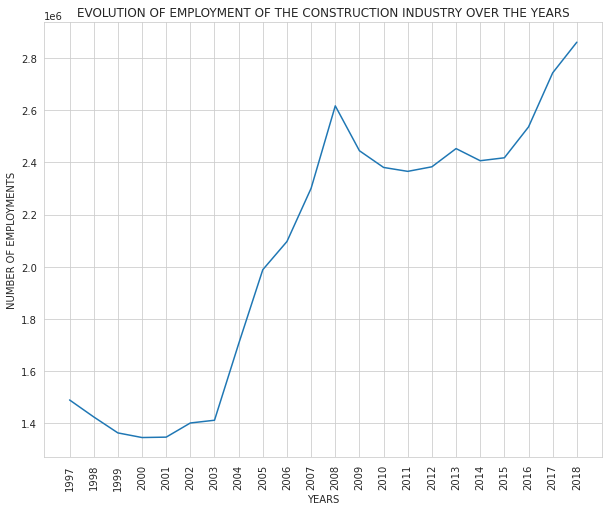

In [114]:
#Visualization with seaborn

plt_1 = plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.lineplot(data=per_year_group)
plt.xlabel('YEARS')
plt.ylabel('NUMBER OF EMPLOYMENTS')
plt.title('EVOLUTION OF EMPLOYMENT OF THE CONSTRUCTION INDUSTRY OVER THE YEARS')
plt.xticks(np.arange(1997,2019), rotation=90)

plt.show()

2. HOW IS THE TOTAL EMPLOYMENT OF EACH INDUSTRY FROM 1997 TO 2018

In [115]:
total_employment = pd.DataFrame(final_data.groupby('LMO_Detailed_Industry')['Employment'].sum())
total_employment

,Employment
LMO_Detailed_Industry,
Accommodation services,9669500
Air transportation,3745250
Ambulatory health care services,17292750
"Amusement, gambling and recreation industries",8717750
"Architectural, engineering and related services",8925250
"Broadcasting, data processing, and information",0
"Business, building and other support services",0
Community colleges,3454250
Computer systems design and related services,9132750


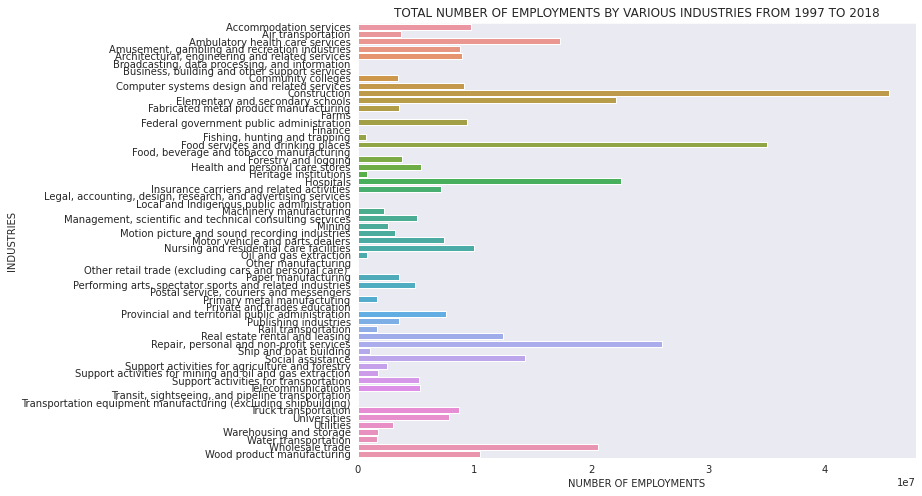

In [116]:
plt_2 = plt.figure(figsize=(10, 8))

sns.set_style('dark')
sns.barplot(x='Employment',y=total_employment.index,data=total_employment,orient ='h')
plt.title('TOTAL NUMBER OF EMPLOYMENTS BY VARIOUS INDUSTRIES FROM 1997 TO 2018')
plt.xlabel('NUMBER OF EMPLOYMENTS')
plt.ylabel('INDUSTRIES')

plt.show()

3. HOW IS THE TREND OF EMPLOYMENT IN THE REAL ESTATE RENTAL AND LEASING INDUSTRY?

In [117]:
#Taking only rows with real estate rental and leasing industry as LMO_Detailed_Industry
estate = final_data[final_data['LMO_Detailed_Industry'] == 'Real estate rental and leasing']

#Displaying the columns
estate

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Real estate rental and leasing,50750,53
1997-02,1997,2,Real estate rental and leasing,50500,53
1997-03,1997,3,Real estate rental and leasing,48000,53
1997-04,1997,4,Real estate rental and leasing,43500,53
1997-05,1997,5,Real estate rental and leasing,44000,53
...,...,...,...,...,...
2018-08,2018,8,Real estate rental and leasing,59750,53
2018-09,2018,9,Real estate rental and leasing,50500,53
2018-10,2018,10,Real estate rental and leasing,55750,53


In [118]:
#Grouping construction by year
per_year_group_estate = pd.DataFrame(estate.groupby('SYEAR')['Employment'].sum())

per_year_group_estate

,Employment
SYEAR,
1997,519750
1998,554500
1999,514500
2000,457250
2001,478000
2002,518750
2003,541250
2004,553250
2005,561500


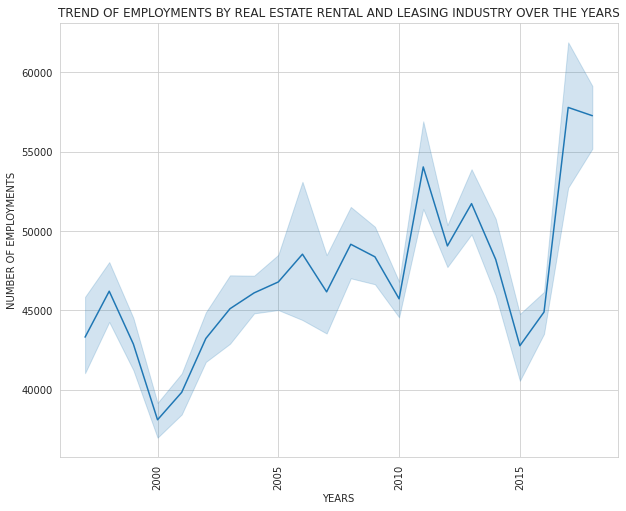

In [119]:
#Visualizing

plt_3 = plt.figure(figsize=(10,8))

sns.set_style('whitegrid')
sns.lineplot(x='SYEAR', y='Employment', data=estate )
plt.xlabel('YEARS')
plt.ylabel('NUMBER OF EMPLOYMENTS')
plt.title('TREND OF EMPLOYMENTS BY REAL ESTATE RENTAL AND LEASING INDUSTRY OVER THE YEARS')
plt.xticks(rotation=90)

plt.show()

4. TOP 10 EMPLOYMENT INDUSTRIES

In [120]:
#Finding top 10 employment industries
top_ten = pd.DataFrame(final_data.groupby('LMO_Detailed_Industry')['Employment'].sum()).sort_values('Employment', ascending=False).iloc[:10]

top_ten

,Employment
LMO_Detailed_Industry,
Construction,45485000
Food services and drinking places,35033250
"Repair, personal and non-profit services",26021250
Hospitals,22518250
Elementary and secondary schools,22085500
Wholesale trade,20564750
Ambulatory health care services,17292750
Social assistance,14290250
Real estate rental and leasing,12423750


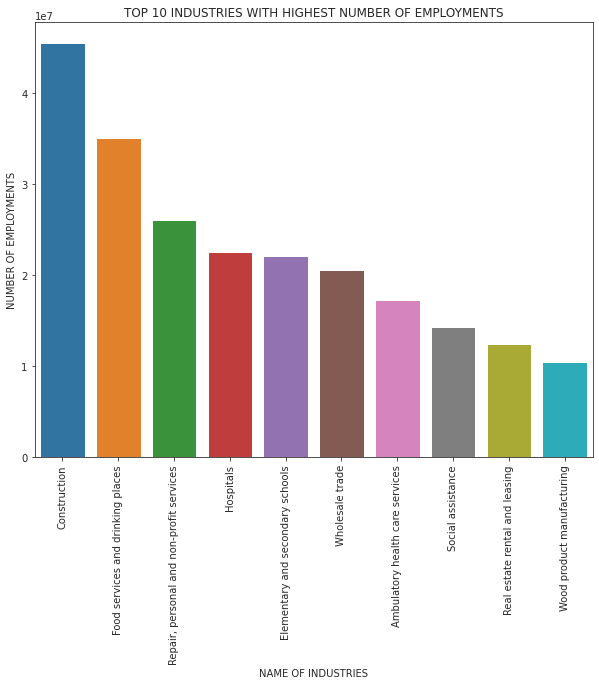

In [121]:
#Visualizing

plt_4 = plt.figure(figsize=(10, 8))
sns.set_style('ticks')
sns.barplot(x=top_ten.index, y='Employment', data=top_ten)
plt.xlabel('NAME OF INDUSTRIES')
plt.ylabel('NUMBER OF EMPLOYMENTS')
plt.title('TOP 10 INDUSTRIES WITH HIGHEST NUMBER OF EMPLOYMENTS')
plt.xticks(rotation=90)

plt.show()

5. TREND OF HOSPITALS OVER THE YEARS

In [122]:
#Taking only rows with hospitals as LMO_Detailed_Industry
hospital = final_data[final_data['LMO_Detailed_Industry'] == 'Hospitals']

#Displaying the columns
hospital

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,NAICS_CODE
DATE,,,,,
1997-01,1997,1,Hospitals,62000,622
1997-02,1997,2,Hospitals,61750,622
1997-03,1997,3,Hospitals,62250,622
1997-04,1997,4,Hospitals,68000,622
1997-05,1997,5,Hospitals,71000,622
...,...,...,...,...,...
2018-08,2018,8,Hospitals,103000,622
2018-09,2018,9,Hospitals,107750,622
2018-10,2018,10,Hospitals,104500,622


In [123]:
#Grouping hospital by year
per_year_group_hospital = pd.DataFrame(hospital.groupby('SYEAR')['Employment'].sum())

per_year_group_hospital

,Employment
SYEAR,
1997,800250
1998,785500
1999,801500
2000,841500
2001,865250
2002,915750
2003,884000
2004,927000
2005,852250


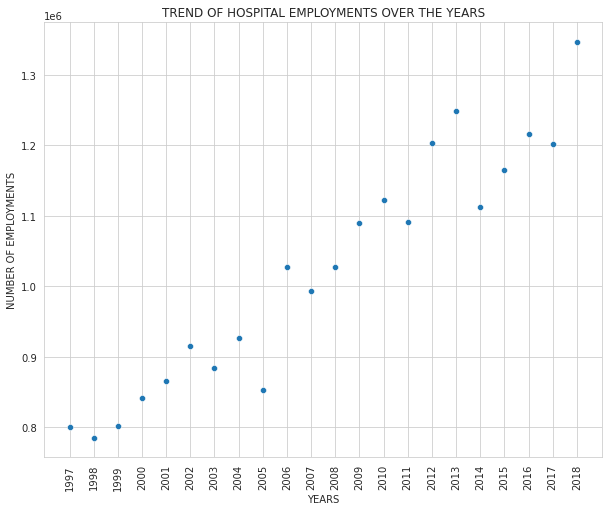

In [124]:
#Visualizing

plt_5 = plt.figure(figsize=(10,8))

sns.set_style('whitegrid')
sns.scatterplot(x='SYEAR', y='Employment', data=per_year_group_hospital )
plt.xlabel('YEARS')
plt.ylabel('NUMBER OF EMPLOYMENTS')
plt.title('TREND OF HOSPITAL EMPLOYMENTS OVER THE YEARS')
plt.xticks(np.arange(1997,2019,1), rotation=90)

plt.show()

[BLOG ABOUT THE PROJECT IN-DEPTH ON DATA INSIGHT](https://www.datainsightonline.com/post/time-series-analysis-of-naics-8)